In [1]:
import pandas as pd


df = pd.read_csv('athens_weather_2024.csv')

# Δείξε τις πρώτες γραμμές
df.head()


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2024-01-01 00:00:00,14.6,13.1,19.2,0.0,NaN,NaN,3.7,NaN,1018.2,NaN
1,2024-01-02 00:00:00,14.6,12.3,17.1,0.0,NaN,NaN,3.4,NaN,1017.0,NaN
2,2024-01-03 00:00:00,15.5,13.4,18.3,0.0,NaN,NaN,10.3,NaN,1015.8,NaN
3,2024-01-04 00:00:00,16.2,13.1,18.8,0.0,NaN,NaN,8.9,NaN,1012.9,NaN
4,2024-01-05 00:00:00,15.3,11.5,21.1,0.0,NaN,NaN,4.0,NaN,1017.4,NaN


In [2]:
# 1. Μετατροπή ημερομηνίας σε datetime
df['date'] = pd.to_datetime(df['date'])

# 2. Εμφάνιση τύπων μετά τη μετατροπή
df.dtypes
# 3. Πόσα NaN έχει κάθε στήλη;
df.isna().sum()


date      0
tavg      0
tmin      0
tmax      0
prcp      2
snow    365
wdir    366
wspd      0
wpgt    366
pres      0
tsun    366
dtype: int64

In [3]:
# Κρατάμε μόνο τις βασικές στήλες για απλή ανάλυση
df = df[['date', 'tavg', 'tmin', 'tmax', 'prcp', 'pres']]

# Διαγράφουμε τις γραμμές με NaN (μόνο 2 έχει)
df = df.dropna()

# Ελέγχουμε ξανά
df.isna().sum()
# Ποια ήταν η πιο ζεστή μέρα;
df[df['tmax'] == df['tmax'].max()]

# Ποια ήταν η πιο κρύα μέρα;
df[df['tmin'] == df['tmin'].min()]


,date,tavg,tmin,tmax,prcp,pres
13,2024-01-14,9.2,3.9,14.6,0.2,1016.9


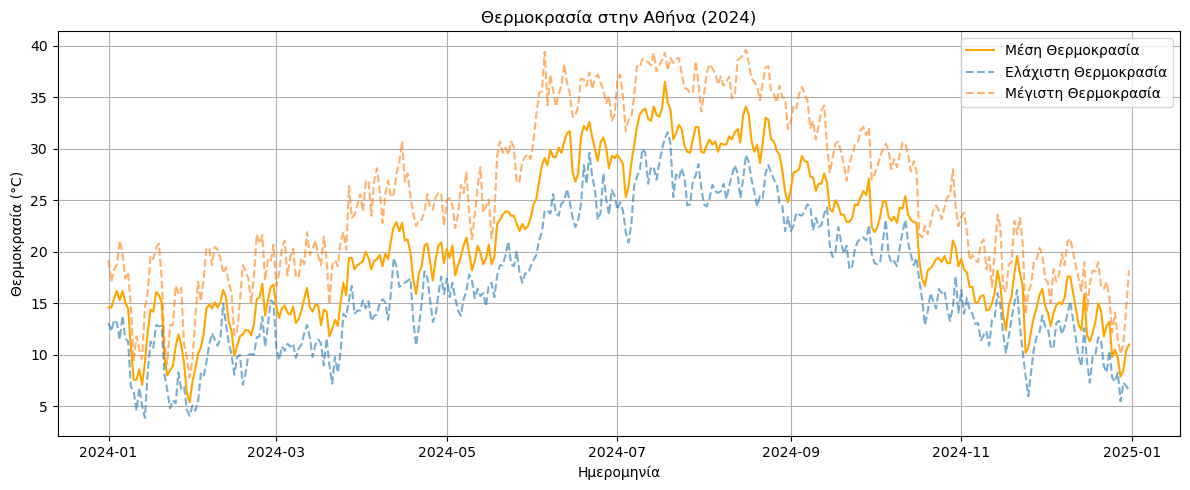

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['tavg'], label='Μέση Θερμοκρασία', color='orange')
plt.plot(df['date'], df['tmin'], label='Ελάχιστη Θερμοκρασία', linestyle='--', alpha=0.6)
plt.plot(df['date'], df['tmax'], label='Μέγιστη Θερμοκρασία', linestyle='--', alpha=0.6)
plt.title('Θερμοκρασία στην Αθήνα (2024)')
plt.xlabel('Ημερομηνία')
plt.ylabel('Θερμοκρασία (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


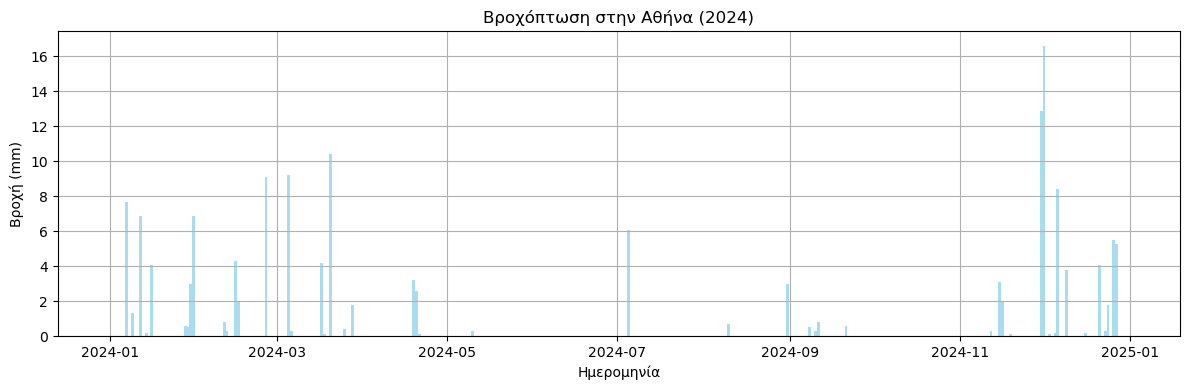

In [5]:
plt.figure(figsize=(12, 4))
plt.bar(df['date'], df['prcp'], width=1.0, color='skyblue', alpha=0.7)
plt.title('Βροχόπτωση στην Αθήνα (2024)')
plt.xlabel('Ημερομηνία')
plt.ylabel('Βροχή (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()
